In [1]:
# Checking virtual RAM memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


## This script contains:

##### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column
##### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis
##### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set
##### 4. Export dataframe

### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Defining the url
path = 'drive/My Drive/Colab Notebooks/ords_prods.pkl'

In [6]:
# Import df as string
ords_prods = pd.read_pickle(path)

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

> The PII was already addressed when I dropped the 'First Name' and 'Surnam' columns from 'customer' dataframe

### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set

In [7]:
# Defining the conditions
conditions = [
    (ords_prods['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'])),
    (ords_prods['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'])),
    (ords_prods['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'])),
    (ords_prods['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']))
]

In [8]:
# Defining values for each region
values = ['Region 1 (Northeast)', 'Region 2 (Midwest)', 'Region 3 (South)', 'Region 4 (West)']

In [9]:
# Create the flag column based on the conditions and values
ords_prods['region'] = np.select(conditions, values, default='Other')
# Now the 'region_flag' column will contain the corresponding region for each state

In [10]:
# Checking df
ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,dependants,status,income,dependants,True,region
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,3,both,Region 3 (South)
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,3,both,Region 3 (South)
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,3,both,Region 3 (South)
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,3,both,Region 3 (South)
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,3,both,Region 3 (South)


In [16]:
# Creating a subset make the crosstab
region_spending_flag = ords_prods[['user_id', 'price_range_loc', 'region']].drop_duplicates()

In [19]:
# Creating crosstab
crosstab = pd.crosstab(region_spending_flag['region'], region_spending_flag['price_range_loc'], dropna =False)

In [22]:
# Checking crosstab
crosstab

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Region 1 (Northeast),16072,36120,36328
Region 2 (Midwest),21531,48153,48453
Region 3 (South),30296,68162,68627
Region 4 (West),23134,52119,52466


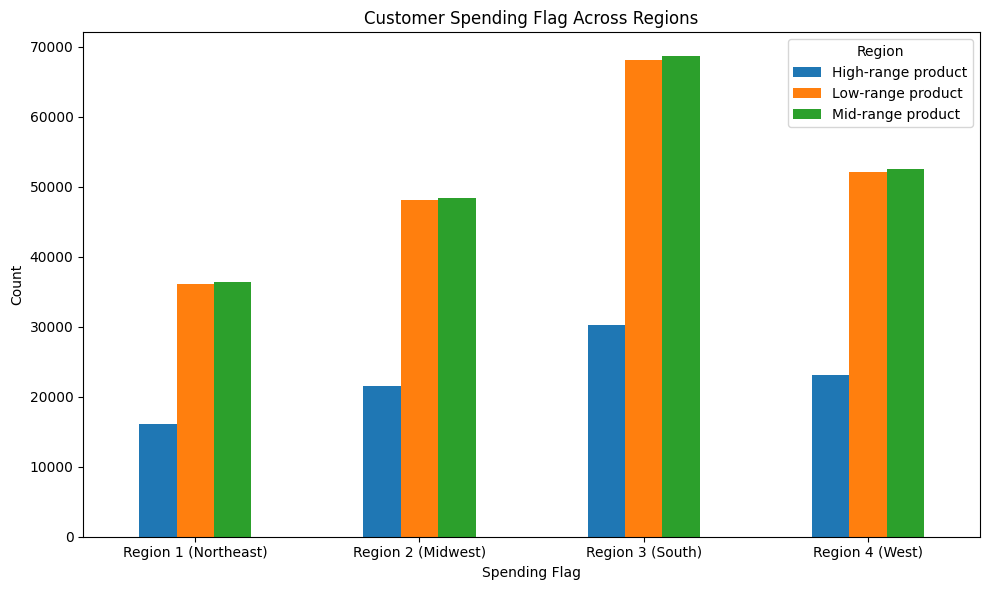

In [21]:
# Plotting the crosstab as a bar chart
crosstab.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Spending Flag')
plt.ylabel('Count')
plt.title('Customer Spending Flag Across Regions')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### 4. Export dataframe

In [23]:
# Exporting df as pickle to my Google Drive
ords_prods.to_pickle('/content/drive/My Drive/Colab Notebooks/ords_prods_region.pkl')